In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
# seed값 설정
np.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('./datasets/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

print(df.shape)
df.head()

(975, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1


In [6]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12,  activation = 'relu'))
model.add(Dense(8,  activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR) : 
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d} - {val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose = 1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=55)

history = model.fit(X,Y,validation_split=0.33, epochs=3500, batch_size=500, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/3500
1/2 [==============>...............] - ETA: 1s - loss: 0.3245 - accuracy: 0.8860
Epoch 1: val_loss improved from inf to 0.28206, saving model to ./model\01 - 0.2821.hdf5
2/2 [==============================] - 2s 382ms/step - loss: 0.3329 - accuracy: 0.8959 - val_loss: 0.2821 - val_accuracy: 0.9099
Epoch 2/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.3193 - accuracy: 0.9060
Epoch 2: val_loss improved from 0.28206 to 0.27035, saving model to ./model\02 - 0.2704.hdf5


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 142ms/step - loss: 0.3154 - accuracy: 0.9035 - val_loss: 0.2704 - val_accuracy: 0.9099
Epoch 3/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.3095 - accuracy: 0.9060
Epoch 3: val_loss improved from 0.27035 to 0.26223, saving model to ./model\03 - 0.2622.hdf5
2/2 [==============================] - 0s 149ms/step - loss: 0.3054 - accuracy: 0.9066 - val_loss: 0.2622 - val_accuracy: 0.9193
Epoch 4/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2815 - accuracy: 0.9220
Epoch 4: val_loss improved from 0.26223 to 0.25913, saving model to ./model\04 - 0.2591.hdf5
2/2 [==============================] - 0s 196ms/step - loss: 0.2937 - accuracy: 0.9158 - val_loss: 0.2591 - val_accuracy: 0.9130
Epoch 5/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2858 - accuracy: 0.9240
Epoch 5: val_loss improved from 0.25913 to 0.25352, saving model to ./model\05 - 0.2535.hdf5
2/2 [==============================] - 0s 228ms/step

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

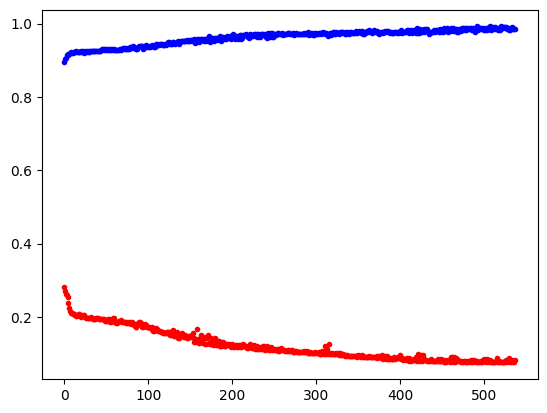

In [9]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']
# y_acc에 학습 셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = 'red', markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12,  activation = 'relu'))
model.add(Dense(8,  activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])